<a href="https://colab.research.google.com/github/ExCaLBBR/ExCaLBBR_Projects/blob/main/GraphingDecisions_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Download CSV
News = pd.read_csv("https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/refs/heads/main/GeometryBasedDecisions/data/NewsHRes_n485analyzed.csv")
Race = pd.read_csv("https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/refs/heads/main/GeometryBasedDecisions/data/blackCoded_n485analyzed.csv")
Belief_Decision = pd.read_csv("https://raw.githubusercontent.com/ExCaLBBR/ExCaLBBR_Projects/refs/heads/main/GeometryBasedDecisions/data/df_ConEngPt1.csv")

In [4]:
News=News.sort_values(by='Unnamed: 0')
Race=Race.sort_values(by='Unnamed: 0')
Belief_Decision=Belief_Decision.sort_values(by='Concept')

In [5]:
News['id']=News.index
Race['id']=Race.index
Belief_Decision['id']=Belief_Decision.index
Belief_Decision.drop(0, inplace=True)

In [6]:
combined_df=pd.DataFrame()
combined_df=pd.merge(News,Race, on='id')
combined_df=pd.merge(combined_df,Belief_Decision, on='id')

In [8]:
combined_df['New Average'] = pd.NA  # Set default as NA (optional)
combined_df.loc[combined_df['Average'] > 0, 'New Average'] = 'Right'
combined_df.loc[combined_df['Average'] < 0, 'New Average'] = 'Left'

for col in combined_df.select_dtypes(include=['object']).columns:
    combined_df[col] = combined_df[col].replace({'Agree': 1, 'Disagree': 0})

<ipython-input-8-dddaaaf3be52>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df[col] = combined_df[col].replace({'Agree': 1, 'Disagree': 0})


In [9]:
combined_df.dropna(inplace=True)
combined_df.sort_values(by='New Average', inplace=True)

In [10]:
right_pa=combined_df.copy()
right_pa = right_pa[right_pa['New Average'] != 'Left']

left_pa=combined_df.copy()
left_pa = left_pa[left_pa['New Average'] != 'Right']

In [11]:
black = combined_df.copy()
black = black[black['Black or African American'] != 0]

white = combined_df.copy()
white = white[white['Black or African American'] != 1]

In [12]:
right_rows=right_pa.shape[0]
left_rows=left_pa.shape[0]

r_counts={}
r_prop={}
r_se={}
for col in right_pa.columns:
  r_counts[col]=right_pa[col].value_counts()
  r_counts[col]=r_counts[col].values[0]
  r_prop[col]=r_counts[col]/right_rows
  r_se[col] = np.sqrt((r_prop[col] * (1 - r_prop[col])) / right_rows)*1.96

l_counts={}
l_prop={}
l_se={}
for col in left_pa.columns:
  l_counts[col]=left_pa[col].value_counts()
  l_counts[col]=l_counts[col].values[0]
  l_prop[col]=l_counts[col]/left_rows
  l_se[col] = np.sqrt((l_prop[col] * (1 - l_prop[col])) / left_rows)*1.96




lr_prop=pd.DataFrame([r_prop,l_prop],index=['Right','Left'])
lr_std=pd.DataFrame([r_se,l_se],index=['Right','Left'])

In [38]:
# for black and white

black_rows=black.shape[0]
white_rows=white.shape[0]

b_counts={}
b_prop={}
b_se={}
for col in black.columns:
  b_counts[col]=black[col].value_counts()
  b_counts[col]=b_counts[col].iloc[0] if not b_counts[col].empty else 0
  b_prop[col]=float(b_counts[col])/black_rows
  b_se[col] = np.sqrt((b_prop[col] * (1 - b_prop[col])) / black_rows) * 1.96

w_counts={}
w_prop={}
w_se={}
for col in white.columns:
  w_counts[col]=white[col].value_counts()
  w_counts[col]=w_counts[col].iloc[0] if not w_counts[col].empty else 0
  w_prop[col]=float(w_counts[col])/white_rows
  w_se[col] = np.sqrt((w_prop[col] * (1 - w_prop[col])) / white_rows) * 1.96


bw_prop=pd.DataFrame([b_prop, w_prop],index=['Black','White'])
bw_se=pd.DataFrame([b_se, w_se],index=['Black','White'])

In [36]:
bw_se

,Unnamed: 0_x,Average,id,Unnamed: 0_y,Black or African American,Concept,Science,Science.1,Science.2,Science.3,...,Firefighters.1,Firefighters.2,Firefighters.3,Firefighters.4,Religion,Religion.1,Religion.2,Religion.3,Religion.4,New Average
Black,0.008116,0.039822,0.008116,0.008116,0.0,0.008116,0.041680,0.051196,0.039822,0.039168,...,0.026351,0.025179,0.054287,0.023938,0.061698,0.062114,0.060932,0.062533,0.063101,0.059819
White,0.008218,0.031815,0.008218,0.008218,0.0,0.008218,0.041559,0.049319,0.035248,0.043341,...,0.025489,0.019916,0.054543,0.022898,0.063522,0.063443,0.057645,0.063299,0.063144,0.059828


In [18]:
lr_all=pd.concat([lr_prop, lr_std])
lr_all


,Unnamed: 0_x,Average,id,Unnamed: 0_y,Black or African American,Concept,Science,Science.1,Science.2,Science.3,...,Firefighters.1,Firefighters.2,Firefighters.3,Firefighters.4,Religion,Religion.1,Religion.2,Religion.3,Religion.4,New Average
Right,0.006211,0.236025,0.006211,0.006211,0.509317,0.006211,0.881988,0.788820,0.900621,0.857143,...,0.962733,0.950311,0.770186,0.956522,0.527950,0.552795,0.732919,0.552795,0.596273,1.0
Left,0.003145,0.135220,0.003145,0.003145,0.500000,0.003145,0.874214,0.811321,0.902516,0.889937,...,0.952830,0.974843,0.748428,0.968553,0.569182,0.575472,0.638365,0.547170,0.503145,1.0
Right,0.012136,0.065594,0.012136,0.012136,0.077221,0.012136,0.049835,0.063046,0.046213,0.054053,...,0.029259,0.033567,0.064987,0.031501,0.077114,0.076803,0.068343,0.076803,0.075790,0.0
Left,0.006154,0.037585,0.006154,0.006154,0.054956,0.006154,0.036448,0.043003,0.032601,0.034399,...,0.023301,0.017212,0.047692,0.019182,0.054427,0.054326,0.052810,0.054711,0.054955,0.0


In [39]:
bw_all=pd.concat([bw_prop, bw_std])
bw_all

,Unnamed: 0_x,Average,id,Unnamed: 0_y,Black or African American,Concept,Science,Science.1,Science.2,Science.3,...,Firefighters.1,Firefighters.2,Firefighters.3,Firefighters.4,Religion,Religion.1,Religion.2,Religion.3,Religion.4,New Average
Black,0.004149,0.112033,0.004149,0.004149,1.0,0.004149,0.875519,0.792531,0.887967,0.892116,...,0.954357,0.958506,0.755187,0.962656,0.605809,0.589212,0.630705,0.568465,0.514523,0.659751
White,0.004202,0.067227,0.004202,0.004202,1.0,0.004202,0.878151,0.815126,0.915966,0.865546,...,0.957983,0.974790,0.756303,0.966387,0.504202,0.525210,0.710084,0.542017,0.554622,0.668067
White,0.009930,0.048721,0.009930,0.009930,0.0,0.009930,0.050995,0.062637,0.048721,0.047922,...,0.032239,0.030806,0.066418,0.029288,0.075486,0.075995,0.074549,0.076507,0.077202,0.073187
White,0.007110,0.027523,0.007110,0.007110,0.0,0.007110,0.035953,0.042667,0.030494,0.037495,...,0.022051,0.017230,0.047186,0.019810,0.054954,0.054886,0.049869,0.054761,0.054627,0.051758


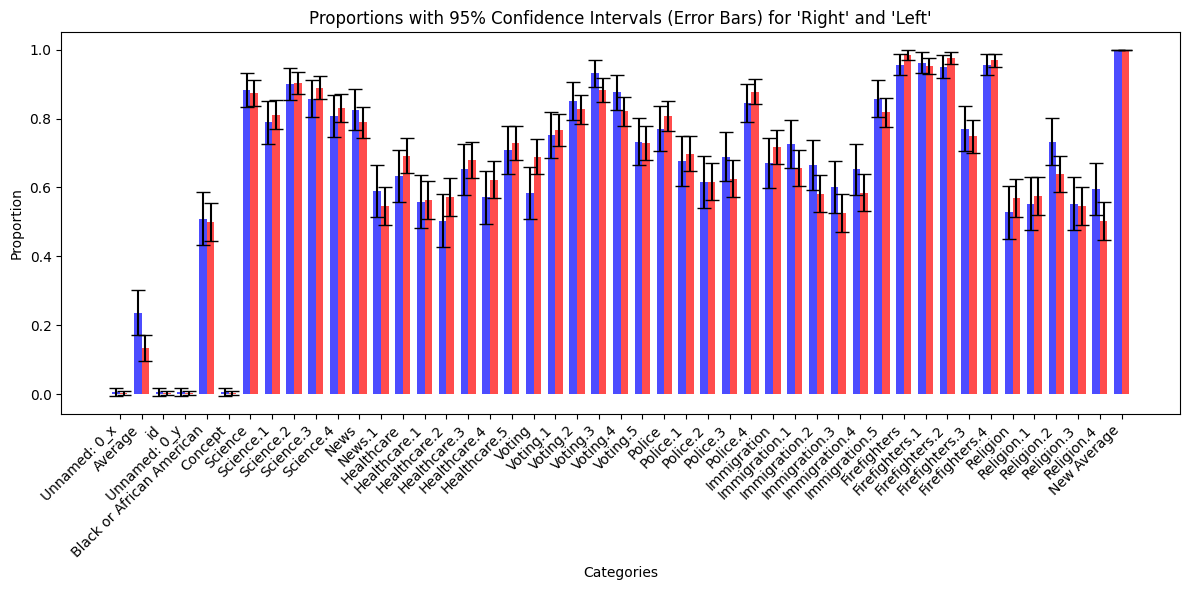

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Set the position of the bars on the x-axis
x = np.arange(len(lr_all.columns))  # The number of categories (columns)
width = 0.35  # Bar width

# Plot the bars for 'Right' and 'Left'
for i, col in enumerate(lr_all.columns):
  # Accessing data using iloc for numerical indexing
  right_proportion = lr_all.iloc[0][col]  # Accessing 'Right' data
  left_proportion = lr_all.iloc[1][col]   # Accessing 'Left' data
  right_se = lr_all.iloc[2][col]         # Accessing 'Right' SE data (assuming it's in the third row)
  left_se = lr_all.iloc[3][col]           # Accessing 'Left' SE data (assuming it's in the fourth row)

  plt.bar(x[i] - width / 2, right_proportion, width, yerr=right_se, capsize=5, label=f"{col} - Right", alpha=0.7, color='blue')
  plt.bar(x[i] + width / 2, left_proportion, width, yerr=left_se, capsize=5, label=f"{col} - Left", alpha=0.7, color='red')

# Formatting
plt.xlabel("Categories")
plt.ylabel("Proportion")
plt.title("Proportions with 95% Confidence Intervals (Error Bars) for 'Right' and 'Left'")
plt.xticks(x, lr_all.columns, rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

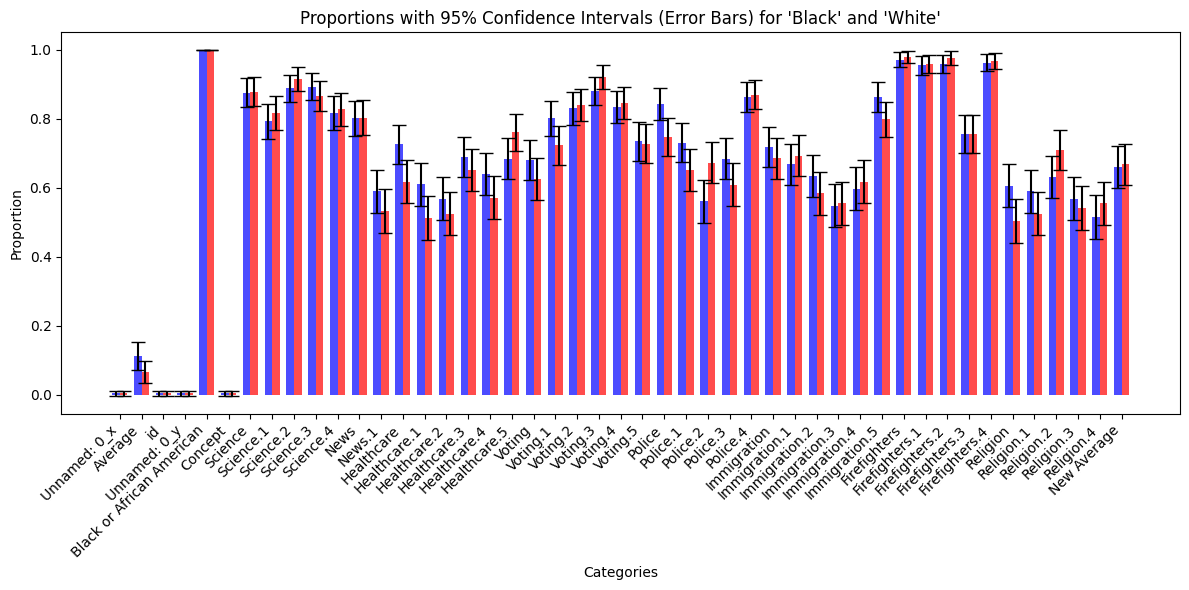

In [45]:
# Plotting
plt.figure(figsize=(12, 6))

# Set the position of the bars on the x-axis
x = np.arange(len(bw_all.columns))  # The number of categories (columns)
width = 0.35  # Bar width

# Plot the bars for 'Right' and 'Left'
for i, col in enumerate(bw_all.columns):
  # Accessing data using iloc for numerical indexing
  black_proportion = bw_all.iloc[0][col]
  white_proportion = bw_all.iloc[1][col]
  # Accessing standard errors from bw_se DataFrame (using column name for indexing)
  black_se = bw_se.loc['Black', col]  # Accessing Black SE data
  white_se = bw_se.loc['White', col]  # Accessing White SE data


  plt.bar(x[i] - width / 2, black_proportion, width, yerr=black_se, capsize=5, label=f"{col} - Black", alpha=0.7, color='blue')
  plt.bar(x[i] + width / 2, white_proportion, width, yerr=white_se, capsize=5, label=f"{col} - White", alpha=0.7, color='red')

# Formatting
plt.xlabel("Categories")
plt.ylabel("Proportion")
plt.title("Proportions with 95% Confidence Intervals (Error Bars) for 'Black' and 'White'")
plt.xticks(x, bw_all.columns, rotation=45, ha='right') # Changed to bw_all.columns

# Show plot
plt.tight_layout()
plt.show()